## Classifying people in outcome level

### From US Census data


In [2]:
import numpy as np
import pandas as pd
import savReaderWriter
import seaborn as sns
sns.set(color_codes=True)
import re
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from scipy import stats
%matplotlib inline

In [3]:
import csv
import more_itertools
with open('us_census_full/columns.csv', 'rb') as f:
    reader = csv.reader(f)
    columns = list(more_itertools.flatten(reader))
print columns, len(columns)       

['age', 'class_of_worker', 'detailed_industry_recode', 'detailed_occupation_recode', 'education', 'wage_per_hour', 'enroll_in_edu_inst_last_wk', 'marital_stat', 'major_industry_code', 'major_occupation_code', 'race', 'hispanic_origin', 'sex', 'member_of_a_labor_union', 'reason_for_unemployment', 'full_or_part_time_employment_stat', 'capital_gains', 'capital_losses', 'dividends_from_stocks', 'tax_filer_stat', 'region_of_previous_residence', 'state_of_previous_residence', 'detailed_household_and_family_stat', 'detailed_household_summary_in_household', 'instance_weight', 'migration_code-change_in_msa', 'migration_code-change_in_reg', 'migration_code-move_within_reg', 'live_in_this_house_1_year_ago', 'migration_prev_res_in_sunbelt', 'num_persons_worked_for_employer', 'family_members_under_18', 'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self', 'citizenship', 'own_business_or_self_employed', 'fill_inc_questionnaire_for_veterans_admin', 'veterans_benefits', 'weeks

In [4]:
data = pd.read_csv('us_census_full/census_income_learn.csv', header=None, names=columns)

In [5]:
data.head()

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,target
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [6]:
data.describe()

,age,detailed_industry_recode,detailed_occupation_recode,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,instance_weight,num_persons_worked_for_employer,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


### Missing values : encoded by 'Not in universe' ?

Theere are no empty cells in the data:

In [90]:
data.isnull().sum()

age                                          0
class_of_worker                              0
detailed_industry_recode                     0
detailed_occupation_recode                   0
education                                    0
wage_per_hour                                0
enroll_in_edu_inst_last_wk                   0
marital_stat                                 0
major_industry_code                          0
major_occupation_code                        0
race                                         0
hispanic_origin                              0
sex                                          0
member_of_a_labor_union                      0
reason_for_unemployment                      0
full_or_part_time_employment_stat            0
capital_gains                                0
capital_losses                               0
dividends_from_stocks                        0
tax_filer_stat                               0
region_of_previous_residence                 0
state_of_prev

But there are a lot of socioeconomic measurements that are not applicable to interviewees (for instance, many of them are children and have no data about work-related variables) and which are encoded by the value *Not in universe*. 

In [41]:
for column in data.select_dtypes(include=[np.object]).columns.tolist():
    n_NiN = len(data[data[column].str.contains('Not in universe')==True].index)
    if n_NiN > 0:
        print '\n Variable:', column, 
        print '\n Number of Not in universe or similar:',n_NiN
# len(data[data['family_members_under_18'].str.contains('Not in universe')==True].index)
# http://stackoverflow.com/questions/11350770/pandas-dataframe-select-by-partial-string


 Variable: class_of_worker 
 Number of Not in universe or similar: 100245

 Variable: enroll_in_edu_inst_last_wk 
 Number of Not in universe or similar: 186943

 Variable: major_industry_code 
 Number of Not in universe or similar: 100684

 Variable: major_occupation_code 
 Number of Not in universe or similar: 100684

 Variable: member_of_a_labor_union 
 Number of Not in universe or similar: 180459

 Variable: reason_for_unemployment 
 Number of Not in universe or similar: 193453

 Variable: region_of_previous_residence 
 Number of Not in universe or similar: 183750

 Variable: state_of_previous_residence 
 Number of Not in universe or similar: 183750

 Variable: migration_code-change_in_msa 
 Number of Not in universe or similar: 1516

 Variable: migration_code-change_in_reg 
 Number of Not in universe or similar: 1516

 Variable: migration_code-move_within_reg 
 Number of Not in universe or similar: 1516

 Variable: live_in_this_house_1_year_ago 
 Number of Not in universe or simil

In [24]:
data['family_members_under_18'].unique()

array([' Not in universe', ' Both parents present', ' Mother only present',
       ' Neither parent present', ' Father only present'], dtype=object)

In [26]:
data.drop(['VETQVA', 'VETYN', 'WKSWORK'], axis = 1, inplace = True, errors = 'ignore')

In [24]:
data['PTOTVAL'].unique()

array([ 0, 52, 30, 49, 32, 15, 38, 48,  9, 24, 50, 10, 45, 43,  4, 26, 40,
       20,  6, 12, 51,  1,  8, 39, 13, 16, 34, 14, 36, 44, 22, 41, 46, 28,
       23, 35, 25, 17, 11, 37,  5, 42, 29,  2, 21, 19, 47,  3, 27,  7, 18,
       33, 31])

### Target variable 

Very imbalanced dataset towards people who earn less than 50k/year

Using `dataframe.describe()` method:
- with the option `include=[np.number]` to compare numerical columns :

Average age for people with higher income is 46, whereas it is 33 years old for people with lower income.

- with the option `include=[np.categorical]` to compare categorical columns : main takeaways :

Hence, as one could have guessed, the top category for `education` is Children among the lower -50k category, and Bachelor degree among the +50k one. This latter category also has a majority of `married` people, while the other is mainly formed of `never married` people. The 50k+ category is mostly male while the 50k- is mostly female, and both are in majority white.
The +50k category works in majority in `Manufacturing - durable goods`, with the `Executive admin and managerial` status. 

In [101]:
data.describe()

,age,detailed_industry_recode,detailed_occupation_recode,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,instance_weight,num_persons_worked_for_employer,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


In [98]:
data['target'].value_counts()

 - 50000.    187141
 50000+.      12382
Name: target, dtype: int64

In [107]:
data[data['target']==' 50000+.'].describe(include=[np.number])

,age,detailed_industry_recode,detailed_occupation_recode,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,instance_weight,num_persons_worked_for_employer,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year
count,12382.000000,12382.000000,12382.000000,12382.000000,12382.000000,12382.000000,12382.000000,12382.000000,12382.000000,12382.000000,12382.000000,12382.000000,12382.000000
mean,46.266193,29.132450,12.060330,81.640284,4830.930060,193.139557,1553.448070,1796.256279,4.003715,0.262559,1.981344,48.069617,94.528428
std,11.830906,15.262802,12.055461,431.364773,16887.627002,607.542507,6998.071762,962.502889,2.118183,0.637988,0.135313,12.259412,0.499211
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.820000,0.000000,0.000000,1.000000,0.000000,94.000000
25%,38.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1122.600000,2.000000,0.000000,2.000000,52.000000,94.000000
50%,45.000000,33.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1684.100000,4.000000,0.000000,2.000000,52.000000,95.000000
75%,53.000000,42.000000,17.000000,0.000000,0.000000,0.000000,363.000000,2240.880000,6.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.000000,3683.000000,99999.000000,8432.830000,6.000000,2.000000,2.000000,52.000000,95.000000


In [109]:
data[data['target']==' - 50000.'].describe(include=[np.object])

,class_of_worker,education,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_a_labor_union,...,migration_code-move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,fill_inc_questionnaire_for_veterans_admin,target
count,187141,187141,187141,187141,187141,187141,187141,187141,187141,187141,...,187141,187141,187141,187141,187141,187141,187141,187141,187141,187141
unique,9,17,3,7,24,15,5,10,2,3,...,10,3,4,5,43,43,43,5,3,1
top,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,?,Not in universe under 1 year old,?,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
freq,99341,47422,174591,85368,99778,99778,156093,160140,101321,170311,...,93153,94669,93153,131852,148861,150091,165840,165843,185388,187141


In [110]:
data[data['target']==' 50000+.'].describe(include=[np.object])

,class_of_worker,education,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_a_labor_union,...,migration_code-move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,fill_inc_questionnaire_for_veterans_admin,target
count,12382,12382,12382,12382,12382,12382,12382,12382,12382,12382,...,12382,12382,12382,12382,12382,12382,12382,12382,12382,12382
unique,9,16,3,7,24,15,5,10,2,3,...,9,3,4,2,42,42,42,5,3,1
top,Private,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,White,All other,Male,Not in universe,...,?,Not in universe under 1 year old,?,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,50000+.
freq,7322,3915,12352,9600,1494,3593,11272,11767,9719,10148,...,6543,6543,6543,12380,10302,10388,11149,11149,12151,12382


### Age

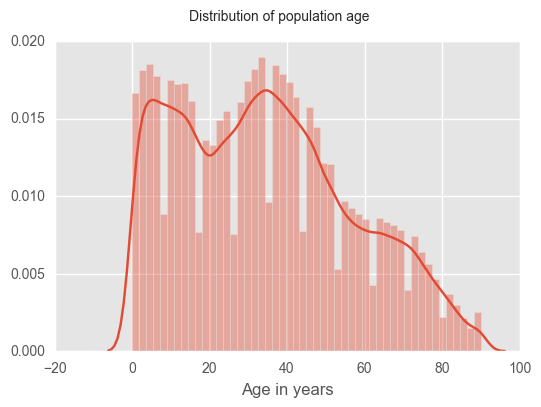

In [43]:
x = data[['AAGE']].dropna(axis=0).astype(str).astype(int)
sns_plot = sns.distplot(x, kde=True, axlabel='Age in years');
fig = sns_plot.get_figure()
fig.suptitle('Distribution of population age')
#fig.savefig('plots-water/dist_rwanda2010_HV204.png') 

There are actually a lot of very young people in our data. 
We can reasonably assume that under a certain age, people are very unlikely to earn more than 50k$ a year. A quick verification below shows that in our train data, people under 15 all fall in the under 50k/year category, and they account for 25% of our data. In order to build a more accurate model, we can just flag the people under 15 in the < 50k category. This will balance a bit more our data and let our ML models perform better.


**Big assumption made: Assign all people under 15 to the < 50k category.**

In [56]:
data[data['age']<=15].groupby('target').count()

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,...,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year
target,,,,,,,,,,,,,,,,,,,,,
- 50000.,50348,50348,50348,50348,50348,50348,50348,50348,50348,50348,...,50348,50348,50348,50348,50348,50348,50348,50348,50348,50348


In [57]:
len(data.index)

199523

For now, let's work only with an 'adult' dataset:

In [59]:
data_adult = data[data['age']>15]
data_adult.to_csv('train_set_adult.csv')

### Distribution of PTOTVAL Total person income

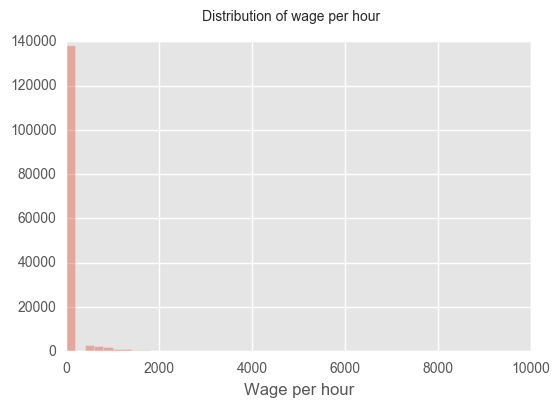

In [60]:
x = data_adult[['wage_per_hour']].dropna(axis=0).astype(str).astype(int)
sns_plot = sns.distplot(x, kde=False, axlabel='Wage per hour');
fig = sns_plot.get_figure()
fig.suptitle('Distribution of wage per hour')
#fig.savefig('plots-water/dist_rwanda2010_HV204.png') 

### Repartition of class of worker ACLSWKR

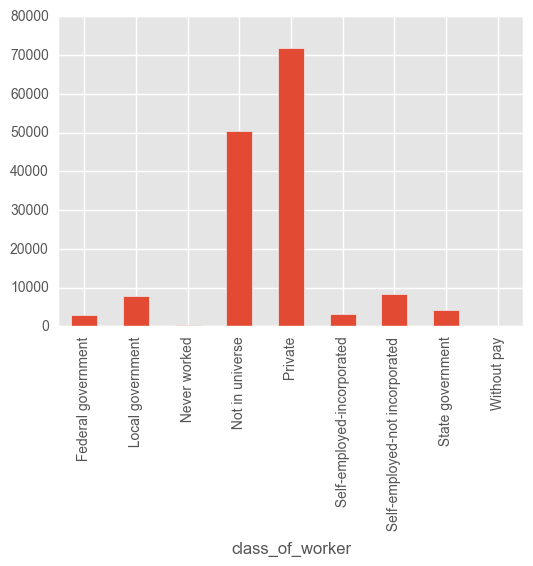

In [61]:
data_adult.groupby(['class_of_worker'])['age'].count().plot(kind='bar')

### Repartition of major industry code AMJIND

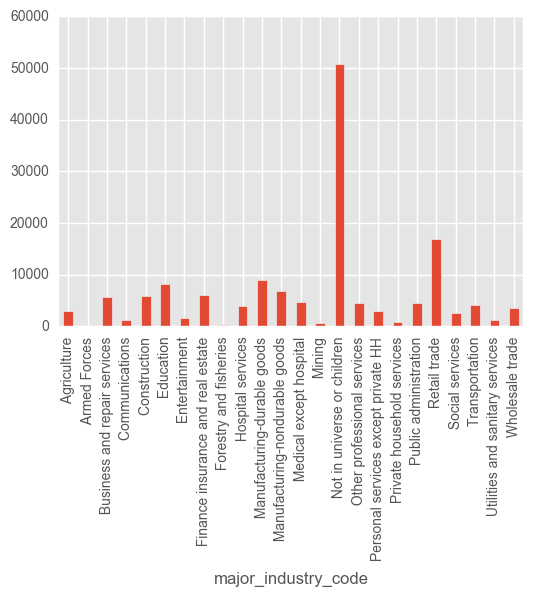

In [62]:
data_adult.groupby(['major_industry_code'])['age'].count().plot(kind='bar')

### Repartition of education AGI

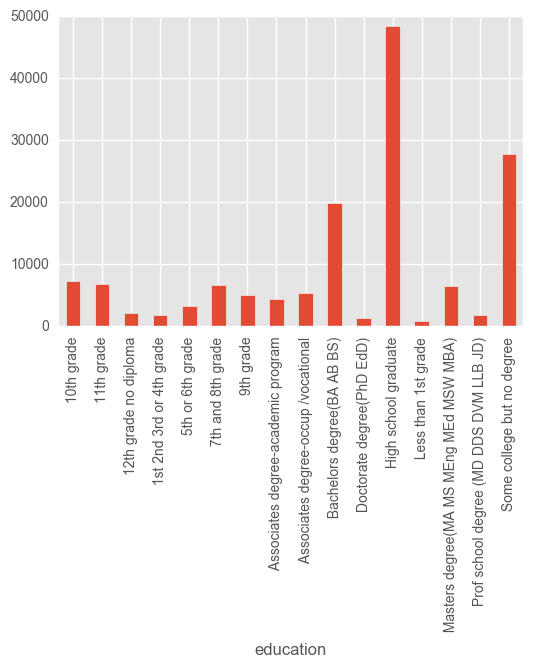

In [63]:
#data.groupby(['AHGA'])['AAGE'].count().plot(kind='bar')
data_adult.groupby(['education'])['age'].count().plot(kind='bar')

### Bivariate visualizations with count of variables broken down by income

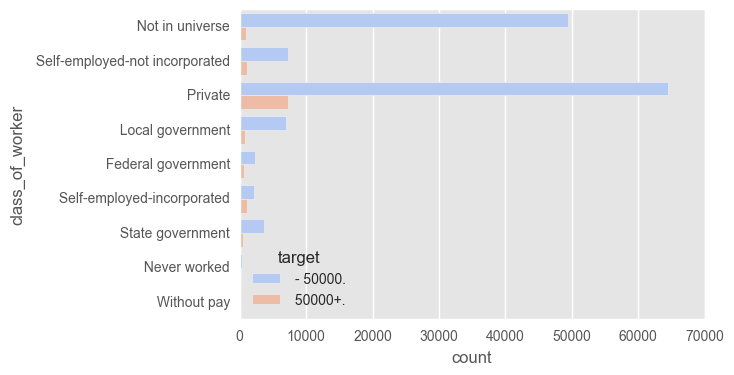

In [64]:
sns.countplot(y="class_of_worker", hue="target", data=data_adult, palette="coolwarm");

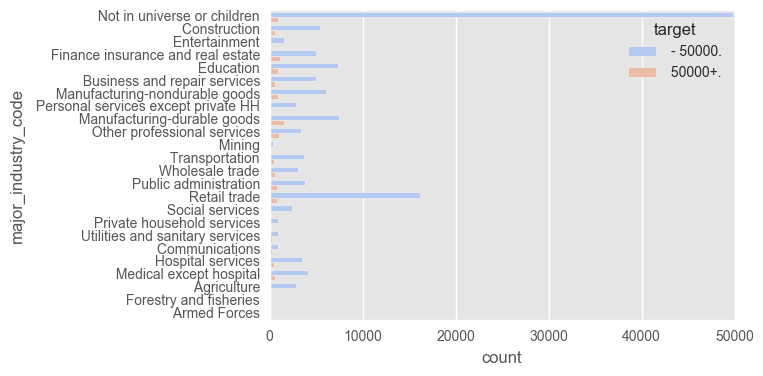

In [65]:
sns.countplot(y="major_industry_code", hue="target", data=data_adult, palette="coolwarm");

Some industries, mainly from the tertiary sector, seem to retain more 50k+ people, such as Finance, insurance and real estate, Education, Manufacturing.
Others on the contrary, such as Agriculture, Mining, Entertainment, do not count 50k+ people.  

Using **percentages** to get better visualization:

In [68]:
data_adult['major_industry_code'].count()

149175

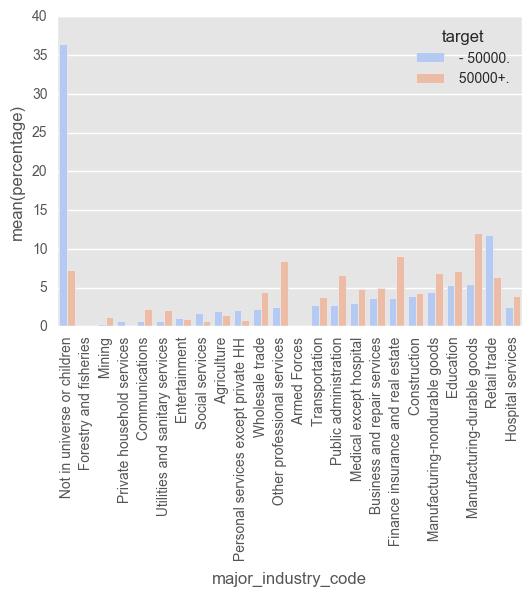

In [69]:
industry_counts = (data_adult.groupby(['target'])['major_industry_code']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('target'))
p = sns.barplot(x="major_industry_code", y="percentage", hue="target", data=industry_counts, palette='coolwarm')
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

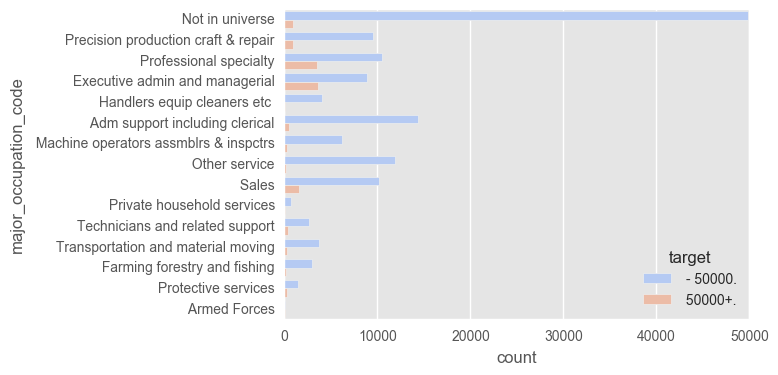

In [66]:
sns.countplot(y="major_occupation_code", hue="target", data=data_adult, palette="coolwarm");

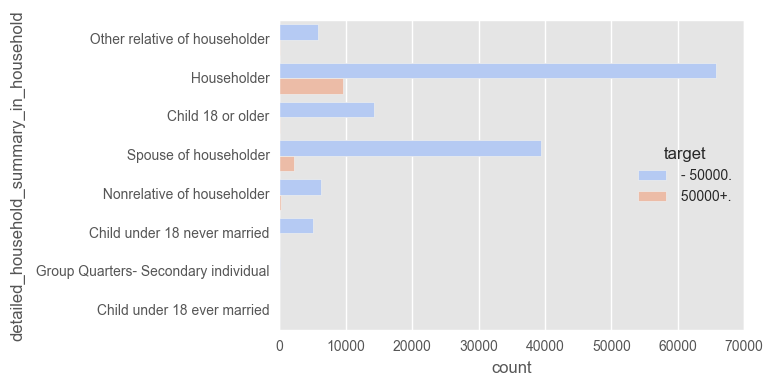

In [67]:
sns.countplot(y="detailed_household_summary_in_household", hue="target", data=data_adult, palette="coolwarm");

Clearly, the `detailed_household_summary_in_household` seems a good criterion for classifying the population : the 50k+ category are either in majority householders, or spouses of householders.

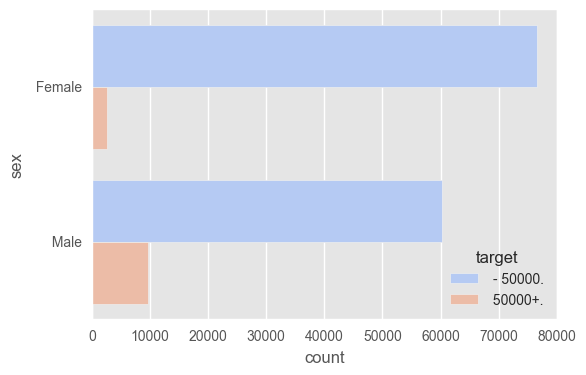

In [70]:
sns.countplot(y="sex", hue="target", data=data_adult, palette="coolwarm");

Men are predominant in the high income category (roughly 3x).

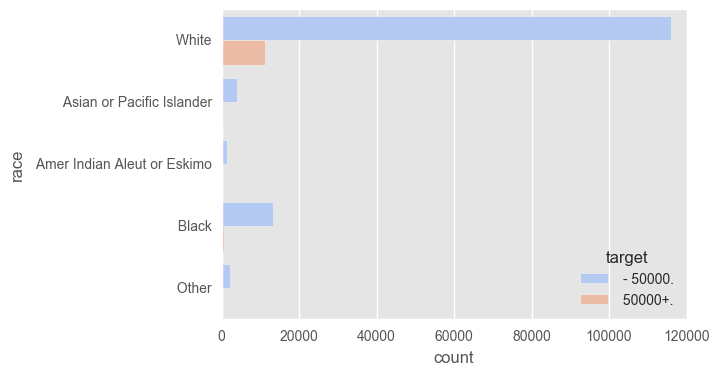

In [71]:
sns.countplot(y="race", hue="target", data=data_adult, palette="coolwarm");

It seems like the 50k+ category is in vast majority white. (sorry for the controversial inference!)

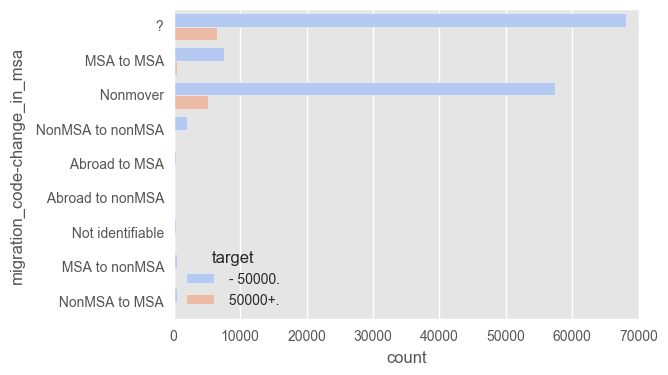

In [72]:
sns.countplot(y="migration_code-change_in_msa", hue="target", data=data_adult, palette="coolwarm");

Not a strong pattern from the migration variables

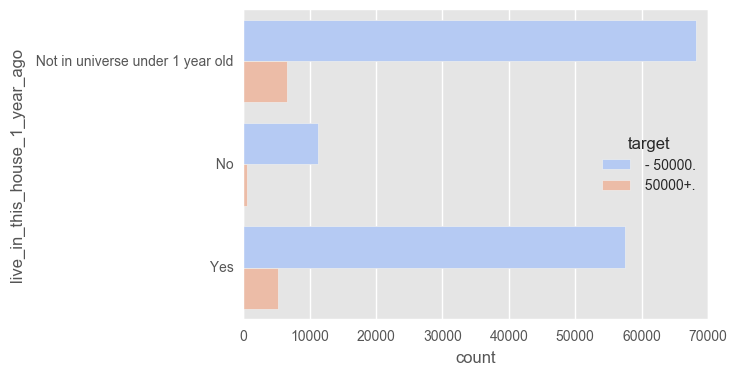

In [73]:
sns.countplot(y="live_in_this_house_1_year_ago", hue="target", data=data_adult, palette="coolwarm");

### Correlation matrix for numerical variables 

**N.B : `detailed_industry_recode` and `detailed_occupation_recode`:**
These two variables are not properly numerical, they are ordinal and are related to categories. Because they provide redundant information in addition to the `major_industry_code` and `major_occupation_code` variables, we decide to drop them out.


In [75]:
data_adult.drop(['detailed_industry_recode', 'detailed_occupation_recode'], axis = 1, inplace= True, errors = 'ignore')

/Users/Mel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [78]:
data_adult.columns.tolist()

['age',
 'class_of_worker',
 'education',
 'wage_per_hour',
 'enroll_in_edu_inst_last_wk',
 'marital_stat',
 'major_industry_code',
 'major_occupation_code',
 'race',
 'hispanic_origin',
 'sex',
 'member_of_a_labor_union',
 'reason_for_unemployment',
 'full_or_part_time_employment_stat',
 'capital_gains',
 'capital_losses',
 'dividends_from_stocks',
 'tax_filer_stat',
 'region_of_previous_residence',
 'state_of_previous_residence',
 'detailed_household_and_family_stat',
 'detailed_household_summary_in_household',
 'instance_weight',
 'migration_code-change_in_msa',
 'migration_code-change_in_reg',
 'migration_code-move_within_reg',
 'live_in_this_house_1_year_ago',
 'migration_prev_res_in_sunbelt',
 'num_persons_worked_for_employer',
 'family_members_under_18',
 'country_of_birth_father',
 'country_of_birth_mother',
 'country_of_birth_self',
 'citizenship',
 'own_business_or_self_employed',
 'fill_inc_questionnaire_for_veterans_admin',
 'veterans_benefits',
 'weeks_worked_in_year',
 'y

In [124]:
data_adult[['low_income', 'high_income']] = pd.get_dummies(data_adult['target'])

/Users/Mel/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [129]:
data_adult.drop(['low_income', 'high_income'], axis=1,inplace=True)

/Users/Mel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


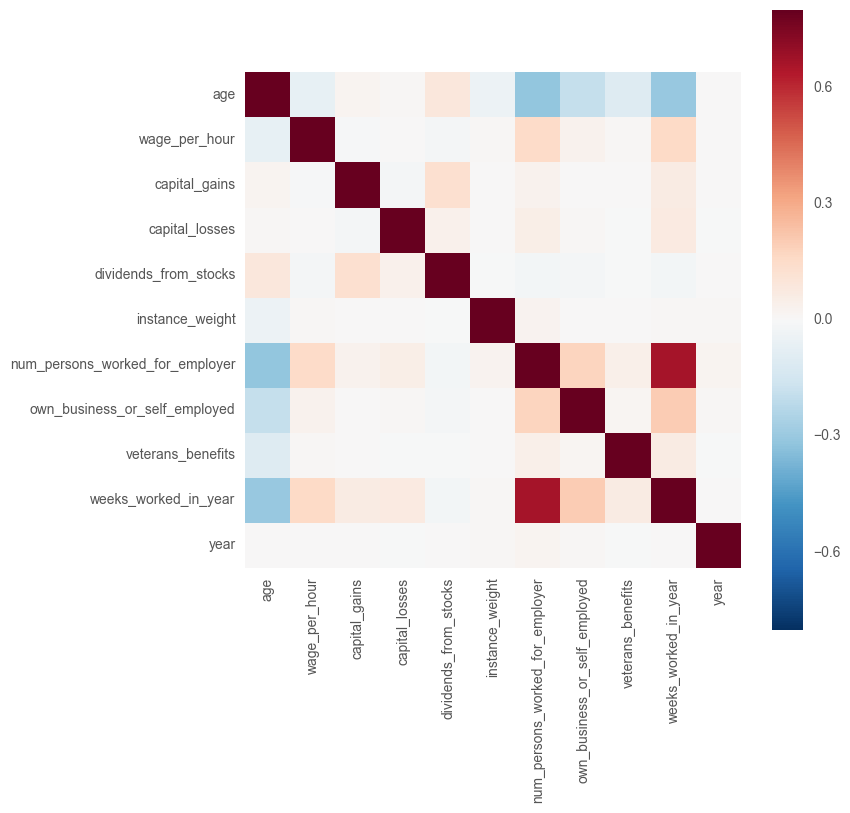

In [130]:
# Compute the correlation matrix between continuous variables
corrmat = data_adult.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

From this correlation matrix, interesting remarks can be drawn :
- number of weeks worked in year is highly correlated with number of persons worked for employer; 
- age is negatively correlated with number of weeks worked and number of persons worked for employer, which makes sense
- 

In [121]:
data_adult[['age', 'num_persons_worked_for_employer', 'weeks_worked_in_year', 'target']].head()

,age,num_persons_worked_for_employer,weeks_worked_in_year,target
0,73,0,0,- 50000.
1,58,1,52,- 50000.
2,18,0,0,- 50000.
5,48,1,52,- 50000.
6,42,6,52,- 50000.


## Feature engineering

Which features to keep :

- age                                          0
- class_of_worker                              0
- detailed_industry_recode                     DROP (keep major_industry_code instead)
- detailed_occupation_recode                   DROP (same as for industry)
- education                                    0
- wage_per_hour                                0
- enroll_in_edu_inst_last_wk                   0
- marital_stat                                 0
- major_industry_code                          0
- major_occupation_code                        0
- race                                         0
- hispanic_origin                              0
- sex                                          0
- member_of_a_labor_union                      0
- reason_for_unemployment                      0
- full_or_part_time_employment_stat            0
- capital_gains                                0
- capital_losses                               0
- dividends_from_stocks                        0
- tax_filer_stat                               0
- region_of_previous_residence                 0
- state_of_previous_residence                  0
- detailed_household_and_family_stat           0
- detailed_household_summary_in_household      0
- instance_weight                              0
- migration_code-change_in_msa                 DROP
- migration_code-change_in_reg                 DROP
- migration_code-move_within_reg               DROP
- live_in_this_house_1_year_ago                0
- migration_prev_res_in_sunbelt                DROP
- num_persons_worked_for_employer              0
- family_members_under_18                      0
- country_of_birth_father                      DROP
- country_of_birth_mother                      DROP
- country_of_birth_self                        0
- citizenship                                  0
- own_business_or_self_employed                0
- fill_inc_questionnaire_for_veterans_admin    0
- veterans_benefits                            0
- weeks_worked_in_year                         0
- year                                         DROP

In [80]:
data.iloc[:,20:30].head()

,region_of_previous_residence,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,instance_weight,migration_code-change_in_msa,migration_code-change_in_reg,migration_code-move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt
0,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?
1,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes
2,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?
3,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe
4,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe


In [81]:
clean_data = data.drop(['detailed_industry_recode', 'detailed_occupation_recode', 
                        'migration_code-change_in_msa', 'migration_code-change_in_reg',
                       'migration_code-move_within_reg', 'migration_prev_res_in_sunbelt',
                       'country_of_birth_father', 'country_of_birth_mother', 'year '], 
                       axis = 1, inplace = False, errors = 'ignore')

In [82]:
len(clean_data.columns)

34

In [83]:
cat_data = clean_data.select_dtypes(include=[np.object])

In [84]:
cat_data.columns.tolist()

['class_of_worker',
 'education',
 'enroll_in_edu_inst_last_wk',
 'marital_stat',
 'major_industry_code',
 'major_occupation_code',
 'race',
 'hispanic_origin',
 'sex',
 'member_of_a_labor_union',
 'reason_for_unemployment',
 'full_or_part_time_employment_stat',
 'tax_filer_stat',
 'region_of_previous_residence',
 'state_of_previous_residence',
 'detailed_household_and_family_stat',
 'detailed_household_summary_in_household',
 'live_in_this_house_1_year_ago',
 'family_members_under_18',
 'country_of_birth_self',
 'citizenship',
 'fill_inc_questionnaire_for_veterans_admin',
 'target']

### Co-occurence matrix of some categorical variables and target

We can have an equivalent of the correlation matrix (that only works for continuous features) for the categorical features, by looking at a co-occurence matrix.
Numerically, a co-occurence matrix is just the dot product of a matrix by its transpose.
For convenient visualization, we only present here the co-occurence matrix of the target and education categories, and co-occurence of target and work categories. We chose these variables because we suspect them to play a major role in the classification task.

In [102]:
subset_cat_data = cat_data[['education', 'target']]
subset_cat_data_dummies = pd.get_dummies(subset_cat_data)
coocc = subset_cat_data_dummies.T.dot(subset_cat_data_dummies)

In [190]:
# Import the .py file with the code that plots a co-occurence matrix (inspired from a stackoverflow question)
from plot_cooc_matrix import heatmap

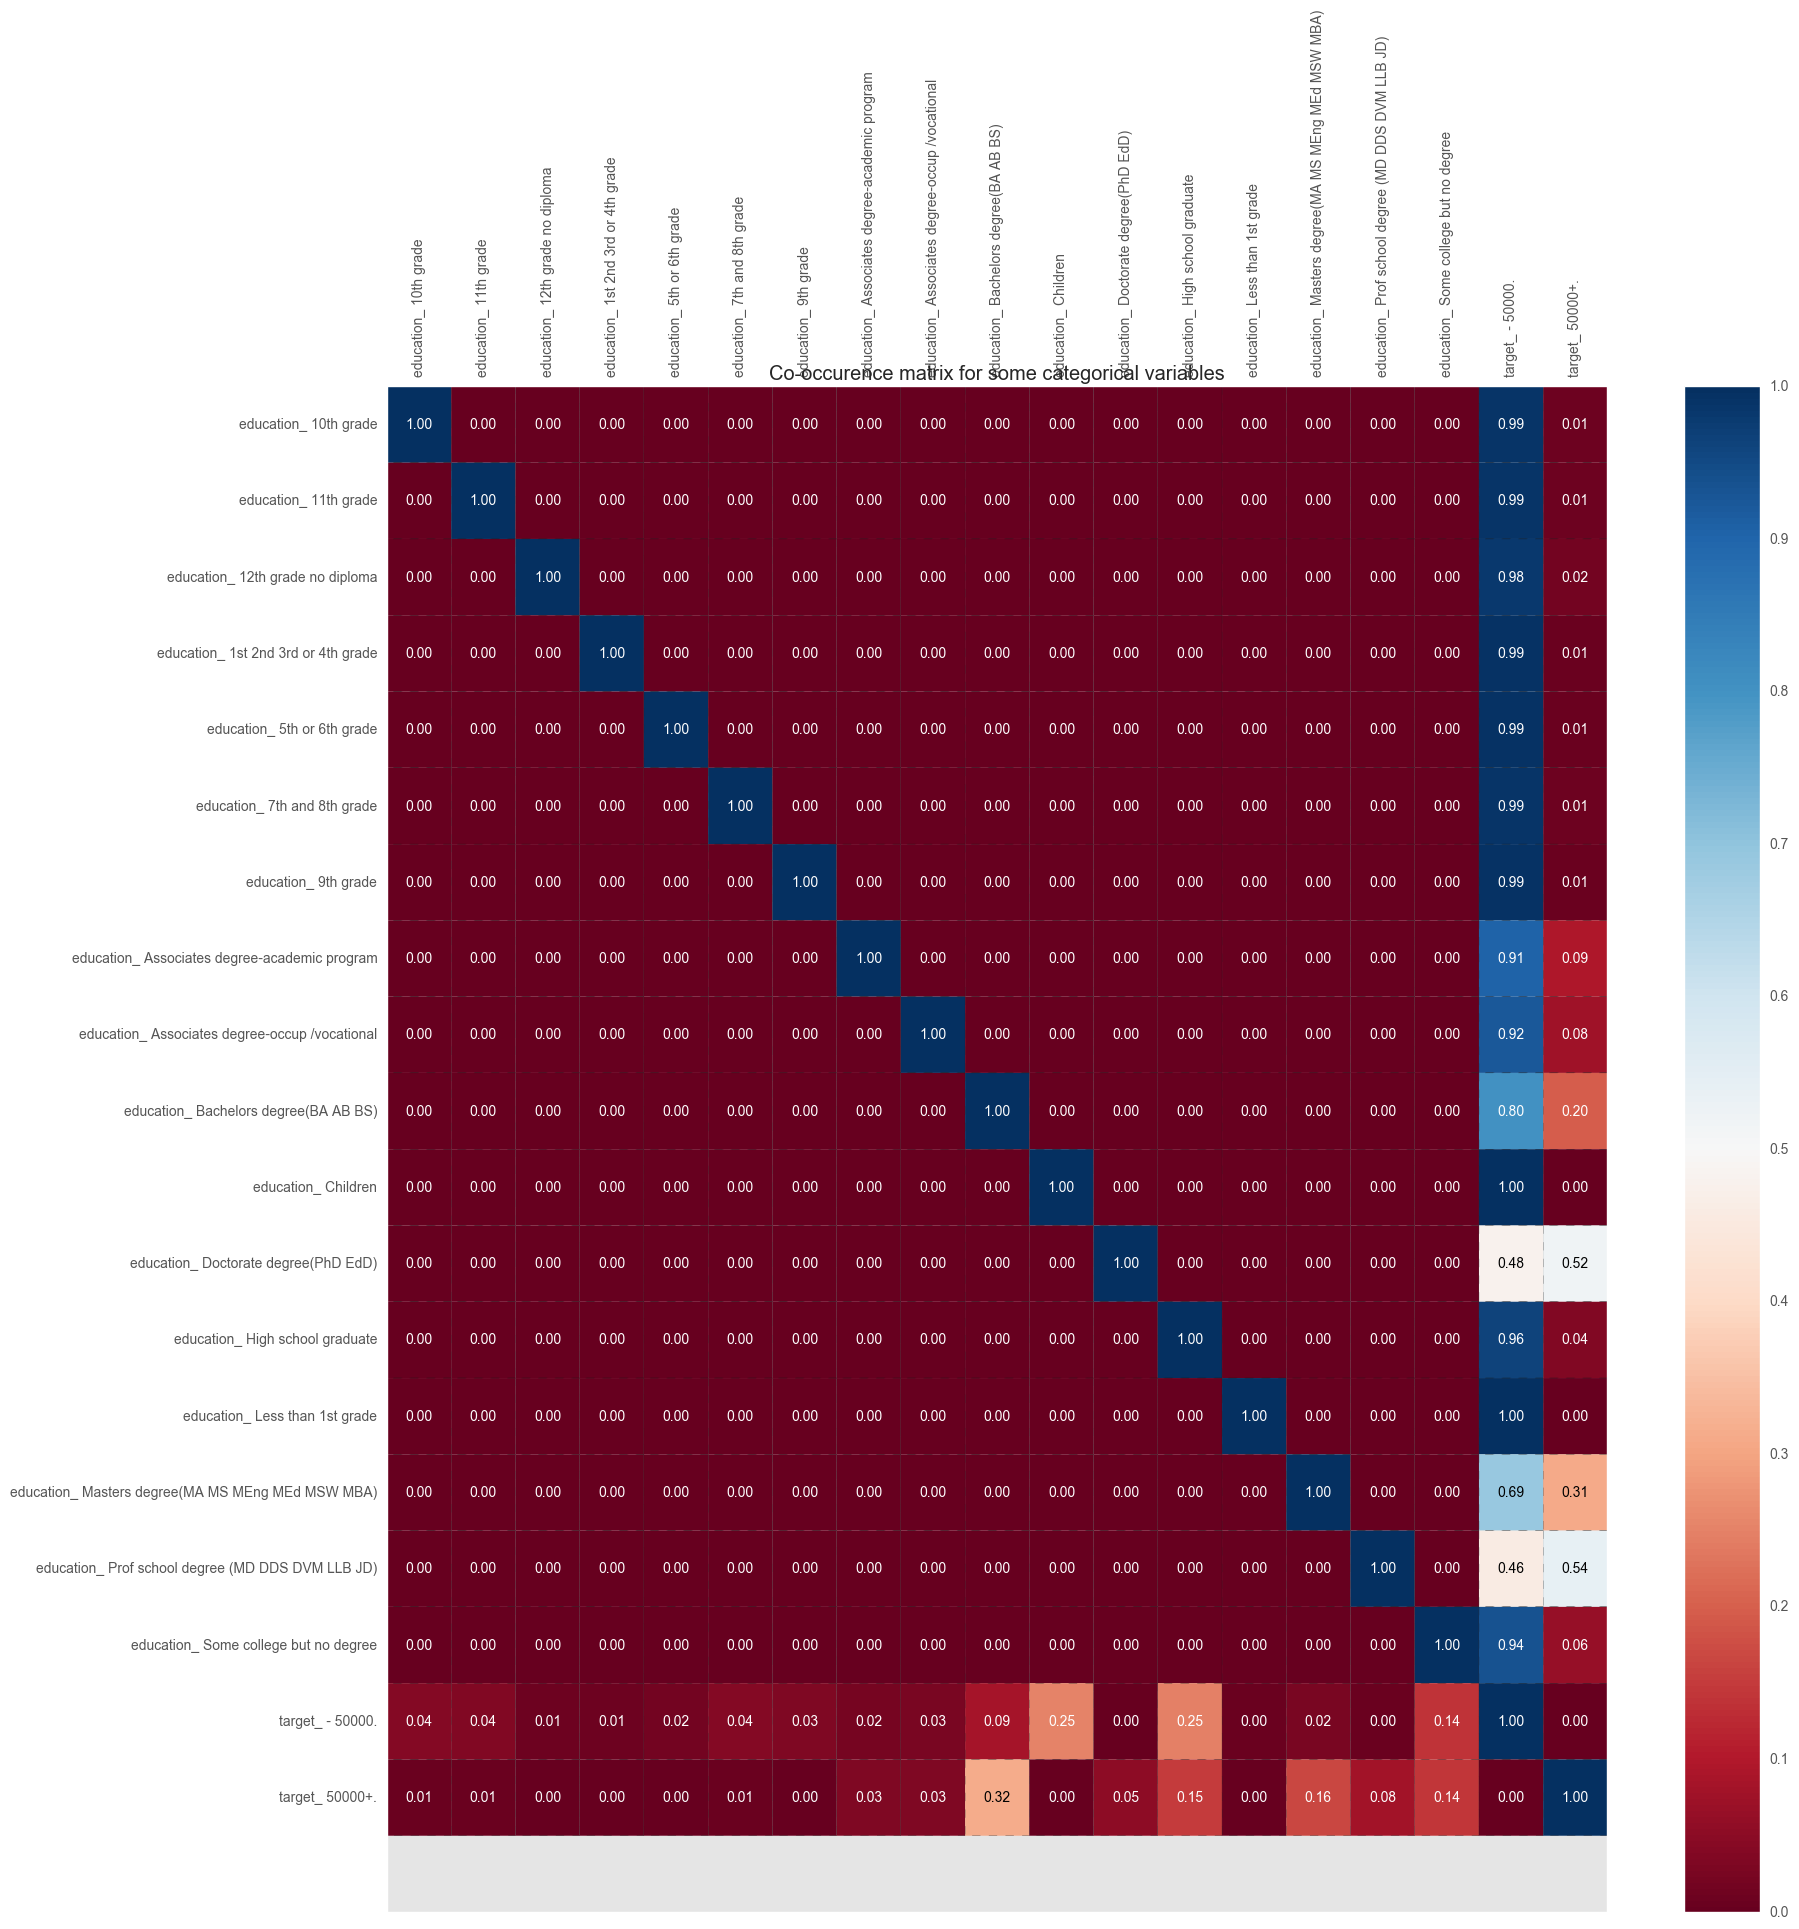

In [116]:
cooc_diagonal = np.diagonal(coocc)
with np.errstate(divide='ignore', invalid='ignore'):
        cooc_percentage = np.nan_to_num(np.true_divide(coocc, cooc_diagonal[:, None]))
        
label_headers = subset_cat_data_dummies.columns.tolist()
"""
label_header_with_count = [ '{0} ({1})'.format(label_header, cooc_diagonal[label_number]) 
                            for label_number, label_header in enumerate(label_headers)]
"""


title = 'Co-occurence matrix for some categorical variables'
x_axis_size = cooc_percentage.shape[0]
y_axis_size = cooc_percentage.shape[1]
xlabel = ''
ylabel = ''
xticklabels = label_headers
yticklabels = label_headers
heatmap(cooc_percentage, title, xlabel, ylabel, xticklabels, yticklabels)

### Co-occurence of work type and  target

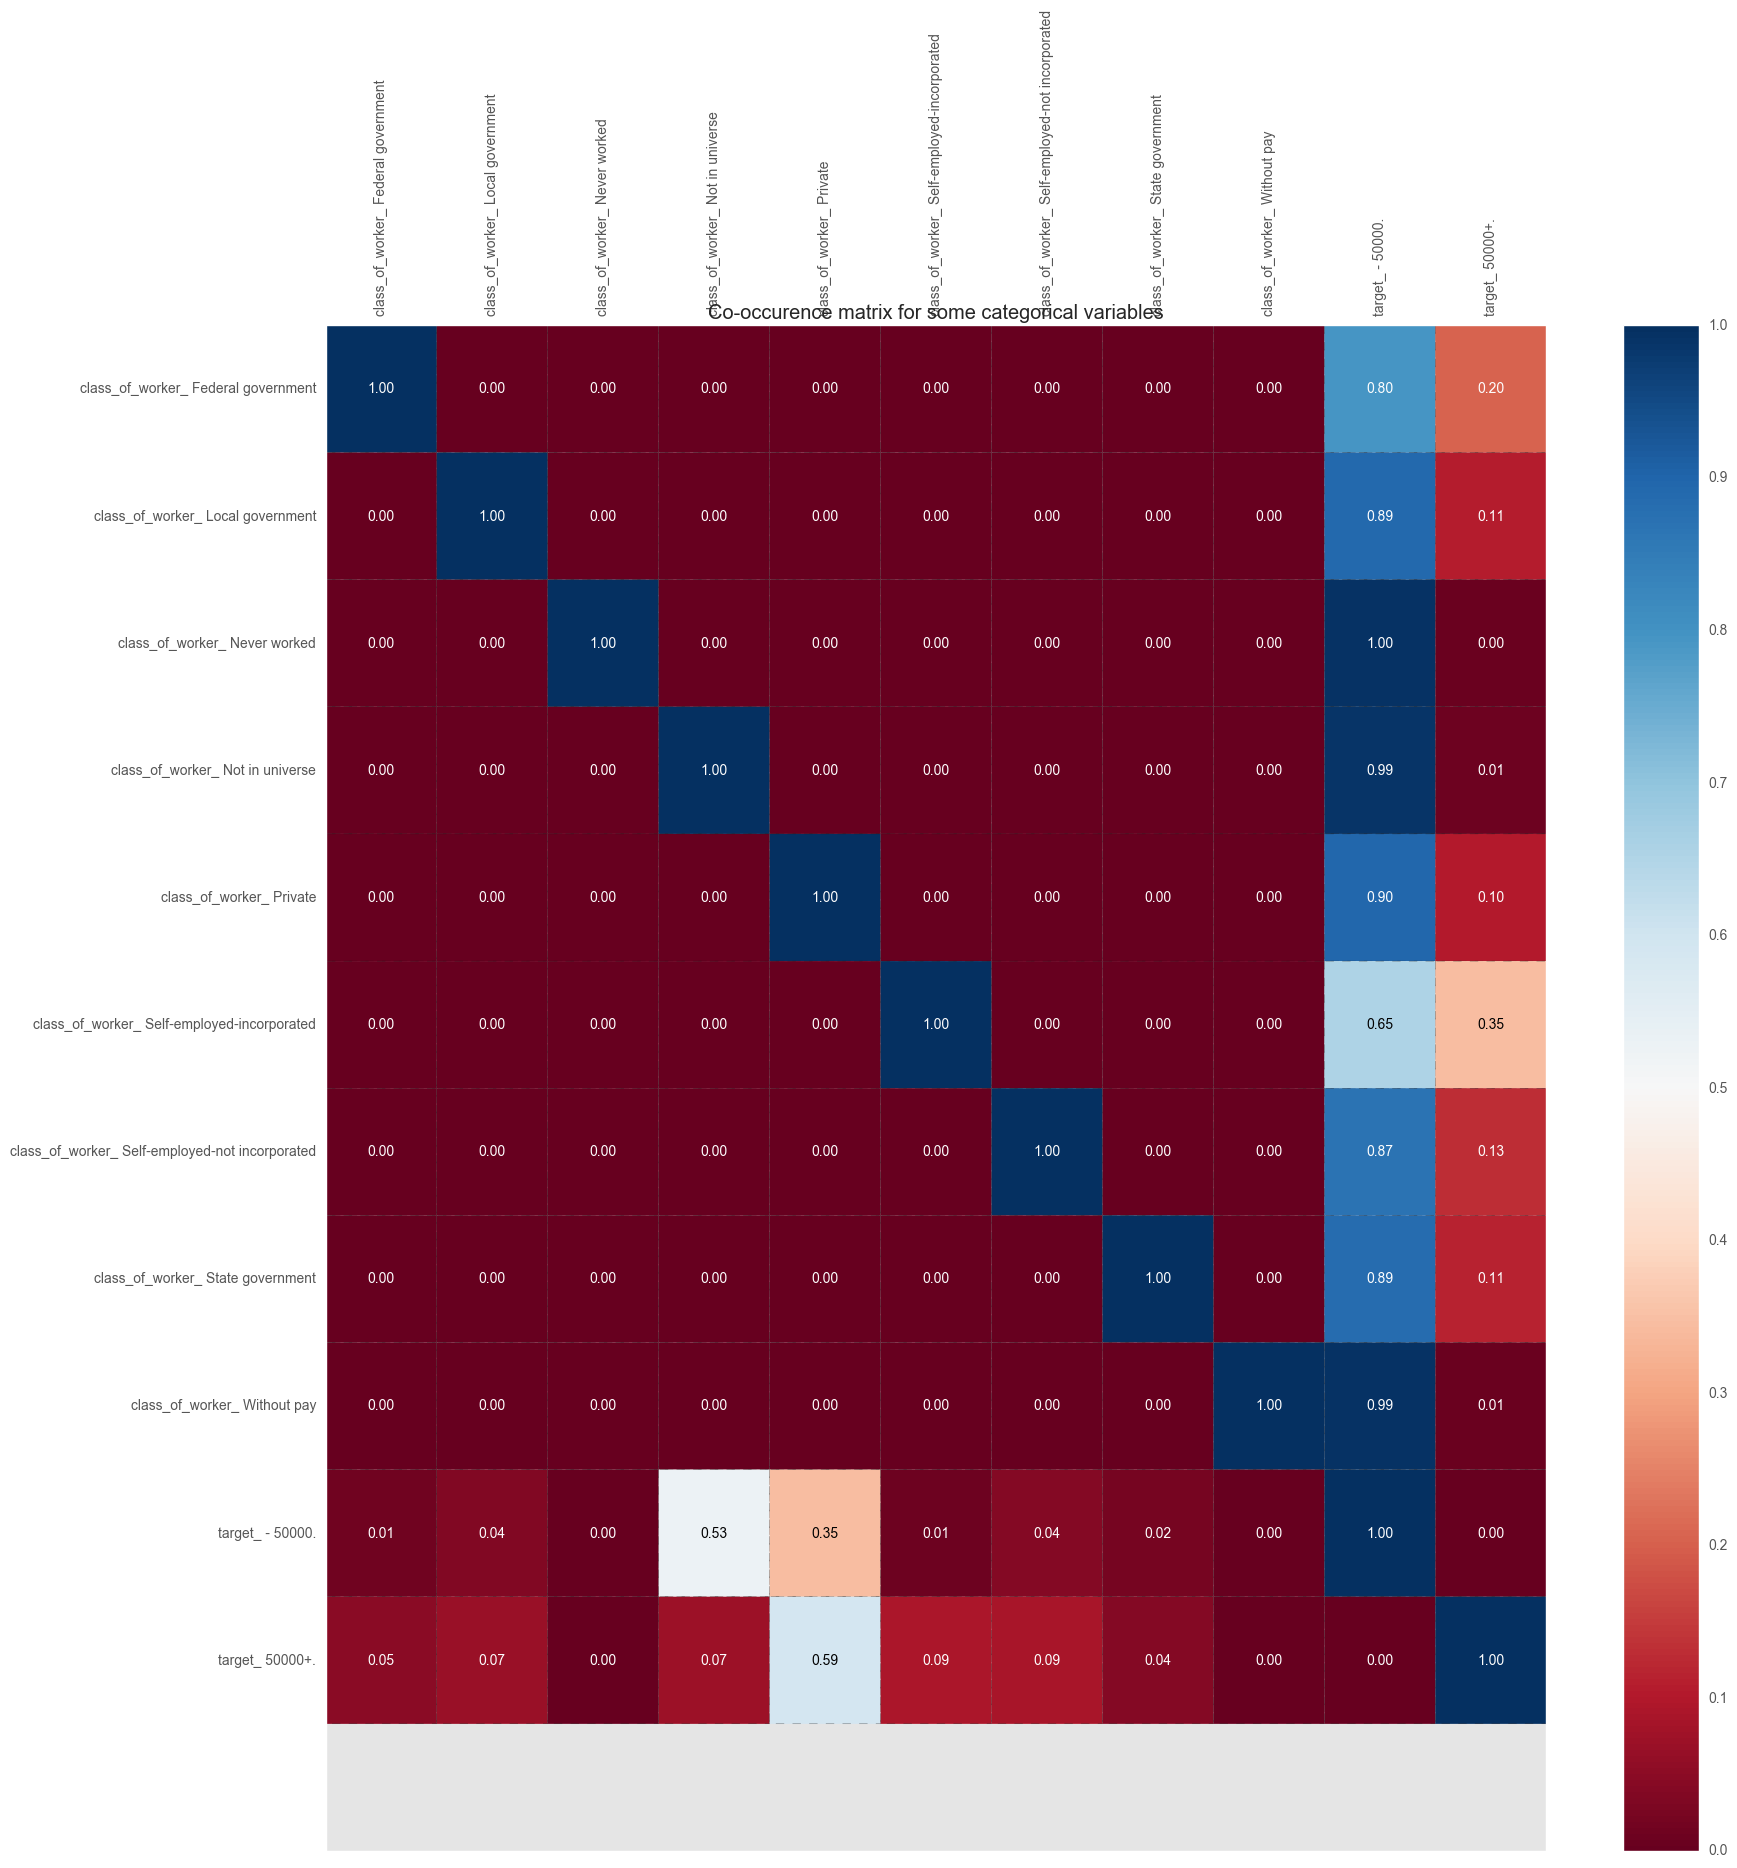

In [191]:
subset_cat_data = cat_data[['class_of_worker', 'target']]
subset_cat_data_dummies = pd.get_dummies(subset_cat_data)
coocc = subset_cat_data_dummies.T.dot(subset_cat_data_dummies)

cooc_diagonal = np.diagonal(coocc)
with np.errstate(divide='ignore', invalid='ignore'):
        cooc_percentage = np.nan_to_num(np.true_divide(coocc, cooc_diagonal[:, None]))
        
label_headers = subset_cat_data_dummies.columns.tolist()
"""
label_header_with_count = [ '{0} ({1})'.format(label_header, cooc_diagonal[label_number]) 
                            for label_number, label_header in enumerate(label_headers)]
"""


title = 'Co-occurence matrix for some categorical variables'
x_axis_size = cooc_percentage.shape[0]
y_axis_size = cooc_percentage.shape[1]
xlabel = ''
ylabel = ''
xticklabels = label_headers
yticklabels = label_headers
heatmap(cooc_percentage, title, xlabel, ylabel, xticklabels, yticklabels)

### Simplify education variable
- No education : less than 1st grade
- Primary education : up to 6th grade
- Middle school : 6 to 8th grade included
- High school no diploma :( Grades 9 through 12). 9th grade, 10th grade, 11th grade, 12th grade no diploma
- High School graduate
- College no degree : some college but no degree
- Bachelors degree
- Masters degree
- Associates degree : Associates degree-academic program, Associates degree-occup /vocational 
- Prof school degree
- Doctorate degree

In [131]:
data_adult['education'].unique()

array([' High school graduate', ' Some college but no degree',
       ' 10th grade', ' Bachelors degree(BA AB BS)',
       ' Masters degree(MA MS MEng MEd MSW MBA)', ' Less than 1st grade',
       ' Associates degree-academic program', ' 7th and 8th grade',
       ' 12th grade no diploma', ' Associates degree-occup /vocational',
       ' Prof school degree (MD DDS DVM LLB JD)', ' 5th or 6th grade',
       ' 11th grade', ' Doctorate degree(PhD EdD)', ' 9th grade',
       ' 1st 2nd 3rd or 4th grade'], dtype=object)

In [139]:
def simple_educ(row):
    if row['education'] in [' 1st 2nd 3rd or 4th grade', ' 5th or 6th grade']:
        new_educ = 'Primary school'
    else:
        if row['education'] ==' 7th and 8th grade':
            new_educ = 'Middle school'
        else:
            if row['education'] in [' 9th grade',' 10th grade',' 11th grade',' 12th grade no diploma'] :
                new_educ = 'High school no diploma'
            else:
                if row['education'] in [ ' Associates degree-occup /vocational', ' Associates degree-academic program']:
                    new_educ = 'Associates degree'
                else:
                    new_educ = row['education']
    return new_educ               
        

In [140]:
data_adult['main_education'] = data_adult.apply(simple_educ, axis=1)

/Users/Mel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [142]:
#data_adult[['education', 'main_education']]

## Selecting features with `ExtraTreesClassifier`

In [244]:
data_adult.columns.tolist()

['age',
 'class_of_worker',
 'wage_per_hour',
 'enroll_in_edu_inst_last_wk',
 'marital_stat',
 'major_industry_code',
 'major_occupation_code',
 'race',
 'hispanic_origin',
 'sex',
 'member_of_a_labor_union',
 'reason_for_unemployment',
 'full_or_part_time_employment_stat',
 'capital_gains',
 'capital_losses',
 'dividends_from_stocks',
 'tax_filer_stat',
 'region_of_previous_residence',
 'state_of_previous_residence',
 'detailed_household_and_family_stat',
 'detailed_household_summary_in_household',
 'instance_weight',
 'live_in_this_house_1_year_ago',
 'migration_prev_res_in_sunbelt',
 'num_persons_worked_for_employer',
 'family_members_under_18',
 'citizenship',
 'own_business_or_self_employed',
 'fill_inc_questionnaire_for_veterans_admin',
 'veterans_benefits',
 'weeks_worked_in_year',
 'year',
 'target',
 'main_education']

In [262]:
# Remove some features because strange values '?'
data_adult_clean = data_adult.drop(['migration_code-change_in_msa','migration_code-change_in_reg',
                                    'migration_code-move_within_reg', 'education'], 
                                   axis = 1, inplace = False, errors = 'ignore')

In [267]:
data_adult_clean.columns.tolist()

['age',
 'class_of_worker',
 'wage_per_hour',
 'enroll_in_edu_inst_last_wk',
 'marital_stat',
 'major_industry_code',
 'major_occupation_code',
 'race',
 'hispanic_origin',
 'sex',
 'member_of_a_labor_union',
 'reason_for_unemployment',
 'full_or_part_time_employment_stat',
 'capital_gains',
 'capital_losses',
 'dividends_from_stocks',
 'tax_filer_stat',
 'region_of_previous_residence',
 'state_of_previous_residence',
 'detailed_household_and_family_stat',
 'detailed_household_summary_in_household',
 'instance_weight',
 'live_in_this_house_1_year_ago',
 'migration_prev_res_in_sunbelt',
 'num_persons_worked_for_employer',
 'family_members_under_18',
 'citizenship',
 'own_business_or_self_employed',
 'fill_inc_questionnaire_for_veterans_admin',
 'veterans_benefits',
 'weeks_worked_in_year',
 'year',
 'target',
 'main_education']

### One-hot encode categorical variables

In [264]:
def one_hot_encode(df):
    """
    One-hot encode all categorical features of a DataFrame
    """
    cat_var = df.select_dtypes(include=[np.object]).columns.tolist()
    df_num = df.drop(cat_var, axis=1, inplace=False, errors='ignore')
    df_cat_dummies = pd.get_dummies(df[cat_var])
    
    # Re-merge the categorical and continuous subsets
    merged = pd.merge(df_cat_dummies, df_num, left_index=True, right_index=True, how='inner')
    return merged

In [194]:
'''
cat_var = data_adult_clean.select_dtypes(include=[np.object]).columns.tolist()
cat_var.remove('target') # remove the target from our features
data_adult_num = data_adult_clean.drop(cat_var, axis=1, inplace=False, errors='ignore')
data_adult_cat_dummies = pd.get_dummies(data_adult_clean[cat_var])

data_adult_1hot = pd.merge(data_adult_cat_dummies, data_adult_num, left_index=True, right_index=True, how='inner')
'''

"\ncat_var = data_adult_clean.select_dtypes(include=[np.object]).columns.tolist()\ncat_var.remove('target') # remove the target from our features\ndata_adult_num = data_adult_clean.drop(cat_var, axis=1, inplace=False, errors='ignore')\ndata_adult_cat_dummies = pd.get_dummies(data_adult_clean[cat_var])\n\ndata_adult_1hot = pd.merge(data_adult_cat_dummies, data_adult_num, left_index=True, right_index=True, how='inner')\n"

In [265]:
X = one_hot_encode(data_adult_clean.drop(['target'], axis=1, inplace=False))
y = data_adult_clean['target']

In [266]:
X.columns.tolist()

['class_of_worker_ Federal government',
 'class_of_worker_ Local government',
 'class_of_worker_ Never worked',
 'class_of_worker_ Not in universe',
 'class_of_worker_ Private',
 'class_of_worker_ Self-employed-incorporated',
 'class_of_worker_ Self-employed-not incorporated',
 'class_of_worker_ State government',
 'class_of_worker_ Without pay',
 'enroll_in_edu_inst_last_wk_ College or university',
 'enroll_in_edu_inst_last_wk_ High school',
 'enroll_in_edu_inst_last_wk_ Not in universe',
 'marital_stat_ Divorced',
 'marital_stat_ Married-A F spouse present',
 'marital_stat_ Married-civilian spouse present',
 'marital_stat_ Married-spouse absent',
 'marital_stat_ Never married',
 'marital_stat_ Separated',
 'marital_stat_ Widowed',
 'major_industry_code_ Agriculture',
 'major_industry_code_ Armed Forces',
 'major_industry_code_ Business and repair services',
 'major_industry_code_ Communications',
 'major_industry_code_ Construction',
 'major_industry_code_ Education',
 'major_industr

In [242]:
print len(data_adult_1hot.index)
print len(data_adult_clean)

149175
149175


In [249]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)

# display the relative importance of each attribute
#print(model.feature_importances_)

# display the top n most important features:
n = 20
top_idx = np.argsort(model.feature_importances_)[-n:]
from operator import itemgetter
print len(X.columns), 'features total (1-hot encoding included)'
print 'Top {} most important features:'.format(n), itemgetter(*list(top_idx))(X.columns.tolist())

243 features total (1-hot encoding included)
Top 20 most important features: ('class_of_worker_ Private', 'tax_filer_stat_ Joint both under 65', 'main_education_ High school graduate', 'detailed_household_summary_in_household_ Householder', 'main_education_ Doctorate degree(PhD EdD)', 'sex_ Male', 'main_education_ Prof school degree (MD DDS DVM LLB JD)', 'capital_losses', 'own_business_or_self_employed', 'sex_ Female', 'main_education_ Bachelors degree(BA AB BS)', 'major_occupation_code_ Professional specialty', 'main_education_ Masters degree(MA MS MEng MEd MSW MBA)', 'weeks_worked_in_year', 'major_occupation_code_ Executive admin and managerial', 'num_persons_worked_for_employer', 'capital_gains', 'dividends_from_stocks', 'age', 'instance_weight')


**Top features** are mainly education level and work-oriented variables. We also find social variables such as household status and age.

About **least important features**: Detailed household and family stat do not play any role in the classification. We will drop this variable for later. Also, country of birth for father, mother (and even self) do not seem to play a big role neither.

In [263]:
n=50
flop_idx = np.argsort(model.feature_importances_)[:n]
print 'Top {} least important features:'.format(n), itemgetter(*list(flop_idx))(X.columns.tolist())

Top 50 least important features: ('family_members_under_18_ Father only present', 'detailed_household_and_family_stat_ Other Rel <18 ever marr not in subfamily', 'detailed_household_and_family_stat_ Other Rel <18 never married RP of subfamily', 'detailed_household_and_family_stat_ Child <18 ever marr not in subfamily', 'detailed_household_and_family_stat_ Other Rel <18 spouse of subfamily RP', 'detailed_household_and_family_stat_ Child under 18 of RP of unrel subfamily', 'detailed_household_and_family_stat_ Grandchild 18+ never marr RP of subfamily', 'detailed_household_and_family_stat_ Grandchild <18 ever marr not in subfamily', 'detailed_household_and_family_stat_ Child <18 spouse of subfamily RP', 'detailed_household_and_family_stat_ Grandchild <18 never marr RP of subfamily', 'detailed_household_and_family_stat_ Grandchild <18 never marr child of subfamily RP', 'detailed_household_and_family_stat_ Grandchild <18 never marr not in subfamily', 'detailed_household_and_family_stat_ Oth

### From this feature importance analysis, drop additional features:

We drop a few more features that only increase the dimension of the roblem without providing much information
Dropping the following variables:
- `state_of_previous_residence`
- `detailed_household_and_family_stat`
- `detailed_household_summary_in_household`

In [272]:
data_adult_clean.drop(['detailed_household_and_family_stat', 'detailed_household_summary_in_household',
                      'state_of_previous_residence'], axis=1, inplace=True) 

# Classification algorithms

## 1. `Logistic Regression`
## 2. `DecisionTree Classifier`
## 3. Ensemble methods : `RandomForest` (bootstrap) and `XGBoost` (boosting)

## 1. Logistic Regression

Not one-hot encoding categorical variables but just converting to numerical variables..?

In [273]:
# Drop useless variables
#data_adult_clean.drop(['detailed_household_and_family_stat', 'country_of_birth_father', 
                      #'country_of_birth_mother'], axis=1, inplace=True) 


# 1-Hot Encode categorical variables
X = one_hot_encode(data_adult_clean.drop(['target'], axis=1, inplace=False))
y = data_adult_clean['target']

In [274]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

lrmodel= LogisticRegression(class_weight='balanced')
scores = cross_val_score(lrmodel, X, y, cv=5)

In [275]:
print scores

[ 0.83483041  0.83385843  0.83448969  0.83257357  0.83223839]


In [276]:
# Computing scores on the real test set
test_data = pd.read_csv('us_census_full/census_income_test.csv', header=None, names=columns)

In [277]:
clean_columns= data_adult_clean.columns.tolist() # take same columns as our actual training set
test_data['main_education'] = test_data.apply(simple_educ, axis=1)
test_data_clean = test_data[clean_columns]

In [278]:
# Only keep the adults dataset
test_data_adult_clean = test_data_clean[test_data_clean['age']>15]
test_data_children_clean = test_data_clean[test_data_clean['age']<=15]

In [279]:
print len(test_data_children_clean.index) + len(test_data_adult_clean.index)== len(test_data_clean.index)
#print len(test_data_children_clean.index)
#print len(test_data_adult_clean.index)
#print len(test_data_clean.index)

True


In [280]:
test_data_adult_clean.columns.tolist()

['age',
 'class_of_worker',
 'wage_per_hour',
 'enroll_in_edu_inst_last_wk',
 'marital_stat',
 'major_industry_code',
 'major_occupation_code',
 'race',
 'hispanic_origin',
 'sex',
 'member_of_a_labor_union',
 'reason_for_unemployment',
 'full_or_part_time_employment_stat',
 'capital_gains',
 'capital_losses',
 'dividends_from_stocks',
 'tax_filer_stat',
 'region_of_previous_residence',
 'instance_weight',
 'live_in_this_house_1_year_ago',
 'migration_prev_res_in_sunbelt',
 'num_persons_worked_for_employer',
 'family_members_under_18',
 'citizenship',
 'own_business_or_self_employed',
 'fill_inc_questionnaire_for_veterans_admin',
 'veterans_benefits',
 'weeks_worked_in_year',
 'year',
 'target',
 'main_education']

In [282]:
X_test = one_hot_encode(test_data_adult_clean.drop(['target'], axis=1, inplace=False))
y_test = test_data_adult_clean['target']

lrmodel.fit(X,y)
print 'Accuracy on the test set:', lrmodel.score(X_test, y_test)

Accuracy on the test set: 0.833825356327


### 'Global' accuracy with the children dataset labeled as < 50k category:

In [304]:
y_test_children = test_data_children_clean['target']
preds_children = [' - 50000.'] * len(y_test_children.index)
from sklearn.metrics import accuracy_score
print 'Accuracy on the children test set, with the decision of putting children in the <50k category:', accuracy_score(y_test_children, preds_children)

Accuracy on the children test set, with the decision of putting children in the <50k category: 1.0


The decision of flagging people under 15 in the < 50k category seems to be most relevant.

Not too bad for a logistic classifier not tuned ! Let's see if we can achieve better accuracy by optimizing hyperparameters, e.g. the penalty (l1 or l2 norm), and the regularization parameter C.

In [285]:
# Optimizing hyperparameters
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

C_range = [0.01, 0.1, 1, 10]
penalty_range = ['l1', 'l2']
param_grid = dict(penalty=penalty_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.33, random_state=42)
grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print grid.best_params_
print grid.best_estimator

KeyboardInterrupt: 

## 2. Decision Tree

In [286]:
from sklearn import tree

In [289]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X, y)
tree_clf.score(X_test, y_test)

0.91274495398137878

In [300]:
# Tuning the parameters of the Decision Tree

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)

parameter_grid = {'criterion':['gini', 'entropy'],
                 'max_depth' : [2,4,6,8]
    
                 }


grid_search = GridSearchCV(clf, param_grid=parameter_grid, cv=5)
grid_search.fit(X.as_matrix(), y.as_matrix().reshape(y.shape[0],))
print('Best score on the training set: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score on the training set: 0.93442600972
Best parameters: {'criterion': 'gini', 'max_depth': 8}


## Visualization of the tree

A graph representation of the tree is isueful to understand the decision process in this algorithm.
To allow good visualizations, we chose to keep the tree 'simple', e.g. we limited its depth to 4 or 6, and required a minimum number of samples of 50 in each leaf.

In [297]:
X.columns.tolist()

['class_of_worker_ Federal government',
 'class_of_worker_ Local government',
 'class_of_worker_ Never worked',
 'class_of_worker_ Not in universe',
 'class_of_worker_ Private',
 'class_of_worker_ Self-employed-incorporated',
 'class_of_worker_ Self-employed-not incorporated',
 'class_of_worker_ State government',
 'class_of_worker_ Without pay',
 'enroll_in_edu_inst_last_wk_ College or university',
 'enroll_in_edu_inst_last_wk_ High school',
 'enroll_in_edu_inst_last_wk_ Not in universe',
 'marital_stat_ Divorced',
 'marital_stat_ Married-A F spouse present',
 'marital_stat_ Married-civilian spouse present',
 'marital_stat_ Married-spouse absent',
 'marital_stat_ Never married',
 'marital_stat_ Separated',
 'marital_stat_ Widowed',
 'major_industry_code_ Agriculture',
 'major_industry_code_ Armed Forces',
 'major_industry_code_ Business and repair services',
 'major_industry_code_ Communications',
 'major_industry_code_ Construction',
 'major_industry_code_ Education',
 'major_industr

In [305]:
simple_clf = DecisionTreeClassifier(criterion='gini', min_samples_leaf=50, max_depth=6, random_state=0)
scores = cross_val_score(simple_clf, X, y, cv=10)
print scores

[ 0.93055835  0.93096052  0.93176029  0.93061608  0.93148756  0.9315546
  0.93034793  0.92954347  0.93041496  0.92914125]


In [306]:
simple_clf.fit(X, y)
simple_clf.score(X_test, y_test)

0.93113904436221795

In [307]:
y_test.unique().tolist()

[' - 50000.', ' 50000+.']

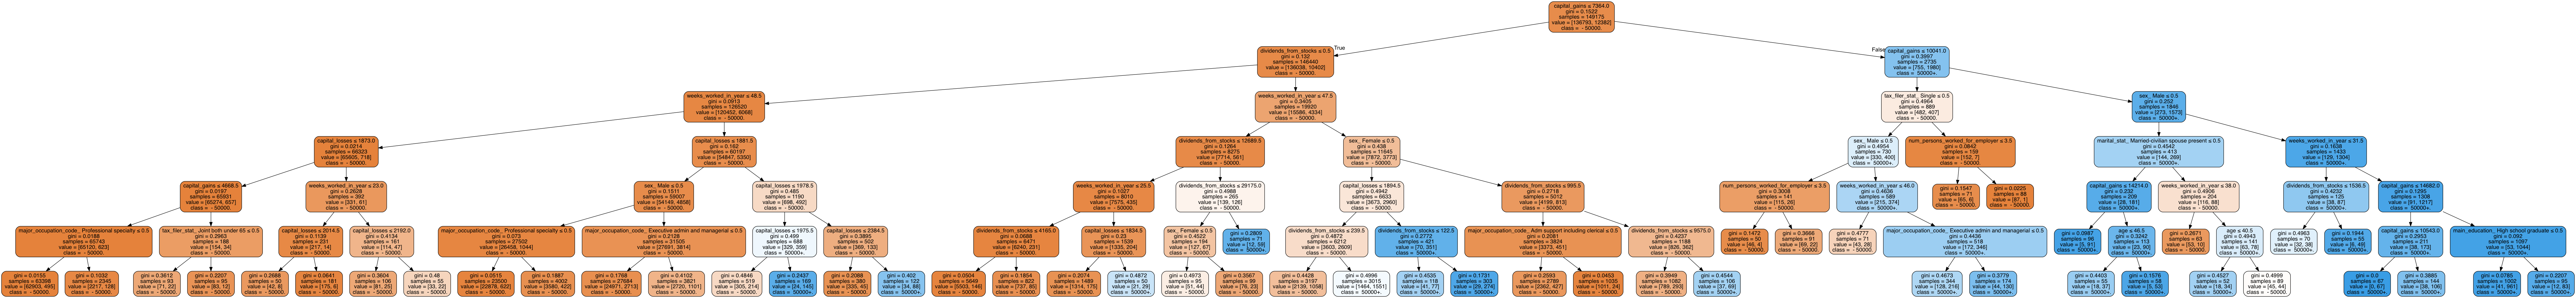

In [308]:
from IPython.display import Image  
import pydotplus 
from sklearn.tree import export_graphviz

labels= y_test.unique().tolist()

# find order of the labels!!!

dot_data = export_graphviz(simple_clf, out_file=None,feature_names=X_test.columns.tolist(),class_names=[' - 50000.', ' 50000+.'],filled=True, rounded=True,special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf('decisiontree_2_maxdepth6.pdf')
Image(graph.create_png())

### Feature importance from the `DecisionTree`:

In [324]:
n = 10
top_idx = np.argsort(simple_clf.feature_importances_)[-n:]
from operator import itemgetter
values= np.sort(simple_clf.feature_importances_)[-n:]
keys = itemgetter(*list(top_idx))(X.columns.tolist())
tuples = zip(keys, values)
feat_weights= sorted(tuples, key=lambda x: x[1], reverse=True)

print len(X.columns), 'features total (1-hot encoding included)'
print 'Top {} most important features for the Decision Tree and their relative weight:'.format(n), feat_weights

146 features total (1-hot encoding included)
Top 10 most important features for the Decision Tree and their relative weight: [('capital_gains', 0.37325281199101223), ('dividends_from_stocks', 0.19817575043848651), ('weeks_worked_in_year', 0.16240480964718756), ('capital_losses', 0.087625059766721525), ('sex_ Female', 0.069504114139928783), ('sex_ Male', 0.043551457408399399), ('major_occupation_code_ Executive admin and managerial', 0.036715785302369519), ('tax_filer_stat_ Single', 0.0098937057560627914), ('major_occupation_code_ Professional specialty', 0.0078418905802377942), ('marital_stat_ Married-civilian spouse present', 0.0058201686677408103)]


Capital gains account for much of the weight! Intuitively, it has a pretty straighforward correlation to the income. It may be worth re-computing classifiers with this variable removed; to see how it impacts the accuracy of our models.

## 3. Ensemble methods

## 3.1 `RandomForest Classifier`


In [327]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators = 100, criterion='gini',
                                random_state=0)
scores = cross_val_score(clf_rf, X, y, cv=10)
print scores

[ 0.94101481  0.93960721  0.94000536  0.93872763  0.93966615  0.94127506
  0.93698465  0.9377891   0.94134209  0.93758799]


In [329]:
np.mean(scores)

0.93940000503174992

In [330]:
clf_rf.fit(X,y)
clf_rf.score(X_test, y_test)

0.93928747946193614

### Retrieving misclassified profiles...
... In order to understand on which criterion the classifier was mistaken 

In [342]:
y_test = np.asarray(y_test)
misclassified = np.where(y_test != clf_rf.predict(X_test))
print misclassified

(array([   22,    26,    47, ..., 74835, 74847, 74849]),)


In [341]:
X_test.iloc[list(misclassified),:]

#misclassified.shape

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

### Fine-tuning the `RandomForest` hyperparameters... 

In [ ]:
clf_rf = DecisionTreeClassifier(random_state=0)

parameter_grid = {n_estimators = [100, 150, 200]
                 'max_depth' : [4,6,8]
    
                 }


grid_search = GridSearchCV(clf, param_grid=parameter_grid, cv=5)
grid_search.fit(X.as_matrix(), y.as_matrix().reshape(y.shape[0],))
print('Best score on the training set: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

## 3.2. `AdaBoost`